In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("/content/House_Price_dataset.csv")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import seaborn as sns

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,float64
bathrooms,float64
stories,float64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,540.000000,540.000000,543.000000,541.000000
mean,4.766729e+06,5150.541284,2.961111,1.285185,1.804788,0.691312
std,1.870440e+06,2170.141023,0.738779,0.502464,0.869011,0.860070
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,5
bathrooms,5
stories,2
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.mean(numeric_only=True)

,0
price,4.766729e+06
area,5.150541e+03
bedrooms,2.961111e+00
bathrooms,1.285185e+00
stories,1.804788e+00
parking,6.913124e-01


In [ ]:
df.median(numeric_only=True)

,0
price,4340000.0
area,4600.0
bedrooms,3.0
bathrooms,1.0
stories,2.0
parking,0.0


In [ ]:
df.mode(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
0,3500000,6000.0,3.0,1.0,2.0,0.0
1,4200000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.std(numeric_only=True)

,0
price,1.870440e+06
area,2.170141e+03
bedrooms,7.387792e-01
bathrooms,5.024642e-01
stories,8.690109e-01
parking,8.600702e-01


In [ ]:
df=df.fillna((df.mode()).iloc[0])

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
X=df[["area"]]
Y=df[["price"]]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
x_train

,area
46,6000
93,7200
335,3816
412,2610
471,3750
...,...
71,6000
106,5450
270,4500
435,4040


In [ ]:
y_train

,price
46,7525000
93,6300000
335,3920000
412,3430000
471,3010000
...,...
71,6755000
106,6160000
270,4340000
435,3290000


In [ ]:
lin_reg= LinearRegression().fit(x_train, y_train)

In [ ]:
lin_reg.coef_

array([[425.72984194]])

In [ ]:
lin_reg.intercept_

array([2512254.26395934])

In [ ]:
y_pred= lin_reg.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

3675286604768.185

In [ ]:
mean_absolute_error(y_test, y_pred)

1474748.1337969352

In [ ]:
r2_score(y_test, y_pred)

0.27287851871974644

<Axes: xlabel='area', ylabel='price'>

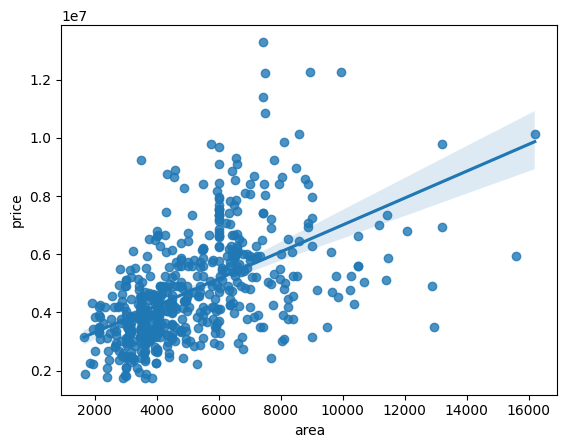

In [ ]:
sns.regplot(x="area", y="price", data=df)

In [ ]:
input_area= int(input("Enter the area of the house: "))
print("The predicted price of the house is:",lin_reg.predict([[input_area]])[0][0])

Enter the area of the house: 4500
The predicted price of the house is: 4428038.552683867


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
iarea = int(input("Enter the area of the house to predict price: "))

input_df = pd.DataFrame([[iarea]], columns=["area"])

predicted_price = lin_reg.predict(input_df)

print("The predicted price of the house is:", predicted_price[0][0])

Enter the area of the house to predict price: 4500
The predicted price of the house is: 4428038.552683867


In [ ]:
X2= df.drop(["price"], axis=1)
Y2= df[["price"]]
X2= X2.replace({'yes':1, 'no':0, 'unfurnished':0, 'semi-furnished':1, 'furnished':2})

/tmp/ipython-input-1860501088.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X2= X2.replace({'yes':1, 'no':0, 'unfurnished':0, 'semi-furnished':1, 'furnished':2})


In [ ]:
X2

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,2
1,8960,4.0,4.0,4.0,1,0,0,0,1,3.0,0,2
2,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,7500,4.0,2.0,2.0,1,0,1,0,1,3.0,1,2
4,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2.0,1.0,1.0,1,0,1,0,0,2.0,0,0
541,2400,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1
542,3620,2.0,1.0,1.0,1,0,0,0,0,0.0,0,0
543,2910,3.0,1.0,1.0,0,0,0,0,0,0.0,0,2


In [ ]:
X2.dtypes

,0
area,int64
bedrooms,float64
bathrooms,float64
stories,float64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64
parking,float64


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X2, Y2, test_size=0.1, random_state=42)

In [ ]:
Multi_model= LinearRegression().fit(x_train, y_train)

In [ ]:
Multi_model.coef_

array([[2.26728571e+02, 1.43353461e+05, 1.02478529e+06, 4.26946845e+05,
        4.57065300e+05, 3.79045558e+05, 3.47462426e+05, 8.39175586e+05,
        8.27109232e+05, 2.44695606e+05, 5.85542138e+05, 2.29674157e+05]])

In [ ]:
Multi_model.intercept_

array([-298699.54138468])

In [ ]:
y_predict= Multi_model.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_predict)

1476594912521.5745

In [ ]:
mean_absolute_error(y_test, y_predict)

885160.7720843288

In [ ]:
r2_score(y_test, y_predict)

0.6822001476547845

In [ ]:
area = int(input('Enter area '))
bedrooms = float(input('Enter number of bedrooms '))
bathrooms = float(input('Enter number of bathrooms'))
stories = float(input('Enter number of stories(floors) '))
mainroad = int(input('Is house on main road (yes:1/no:0)'))
guestroom = int(input('Does house have guest room (yes:1/no:0)'))
basement = int(input('Does house have a basement (yes:1/no:0)'))
hotwaterheating = int(input('Does house have hot water heating (yes:1/no:0)'))
airconditioning = int(input('Does house have AC(yes:1/no:0'))
parking = float(input("How many cars can parking accomodate (enter 0 if none)"))
prefarea = int(input("Is house in preferred area (yes:1/no:0) "))
furnishing = int(input("Furnishing status of house (furnished:2,semi-furnished:1,unfurnished:0) "))
print("The price of your house depending on all factors is",Multi_model.predict([[area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing]])[0,0])

Enter area 7420
Enter number of bedrooms 4
Enter number of bathrooms2
Enter number of stories(floors) 3
Is house on main road (yes:1/no:0)1
Does house have guest room (yes:1/no:0)0
Does house have a basement (yes:1/no:0)0
Does house have hot water heating (yes:1/no:0)0
Does house have AC(yes:1/no:01
How many cars can parking accomodate (enter 0 if none)2
Is house in preferred area (yes:1/no:0) 1
Furnishing status of house (furnished:2,semi-furnished:1,unfurnished:0) 2
The price of your house depending on all factors is 8105907.612141561


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
